In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py 
import seaborn as sns


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Why do EDA?
- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- Feature engineering
- Detecting outliers


# It is also an iterative process. 

# Columns Types
- Numerical - Age, Fare, PassengerID
- Categorical - Survival, Pclass, Sex, SibSp, Parch, Embarked
- Mixed - Name, Ticket, Cabin 

# Univariate Analysis
### Univariate Analysis 

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


### Age
**conclusions
- Age is normally distributed
- 20% values are missing
- There are 8 outliers (greater than 65)


In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

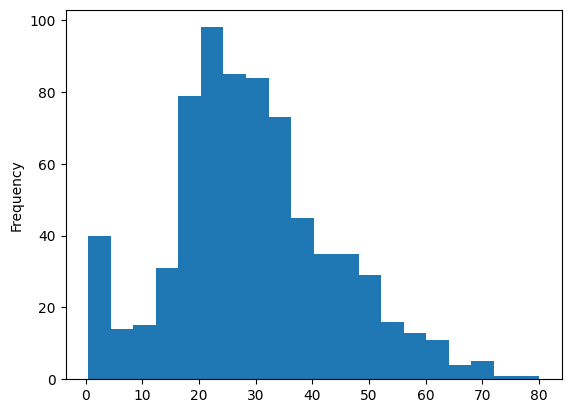

In [5]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

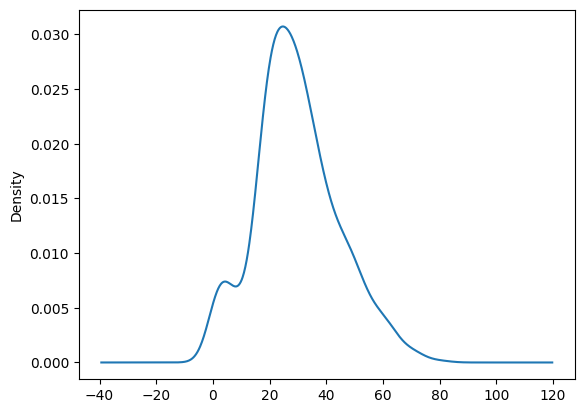

In [6]:
df['Age'].plot(kind='kde')

<Axes: >

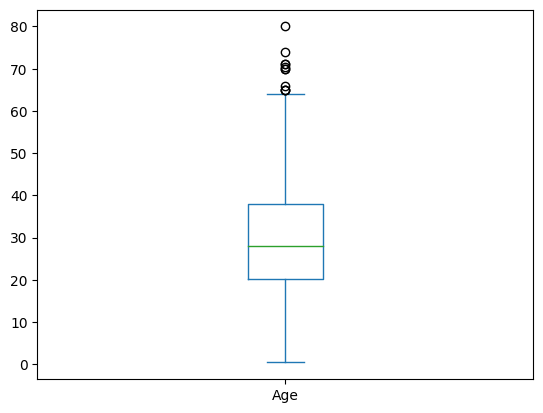

In [7]:
df['Age'].plot(kind='box')

In [8]:
(df['Age'] > 65).sum()

8

In [9]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [10]:
df['Age'].isnull().sum()

177

In [11]:
df['Age'].shape

(891,)

### Fare
**conclusions**
- data is highly positively skewed
- Fair column actually contains the group fare and not the individual fare .(this will might cause an issue.)
- We need to create a new column calle individual fare

In [12]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
(df['Fare'] > 50 ).sum()

160

In [14]:
df['Fare'].isnull().sum()

0

<Axes: ylabel='Frequency'>

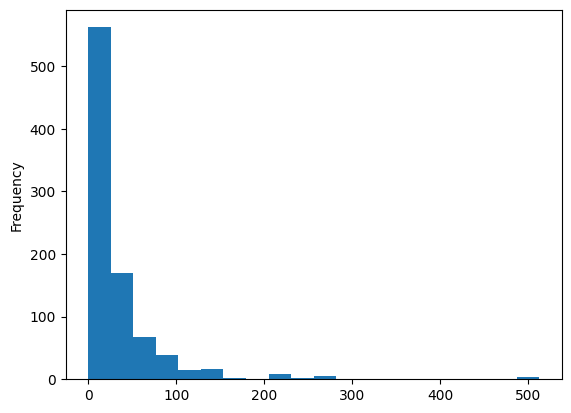

In [15]:
df['Fare'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

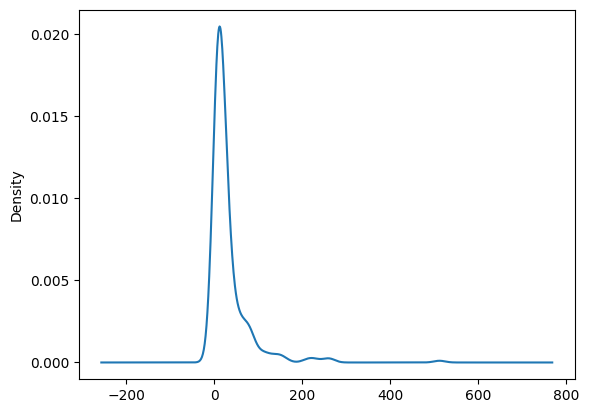

In [16]:
df['Fare'].plot(kind='kde')

<Axes: >

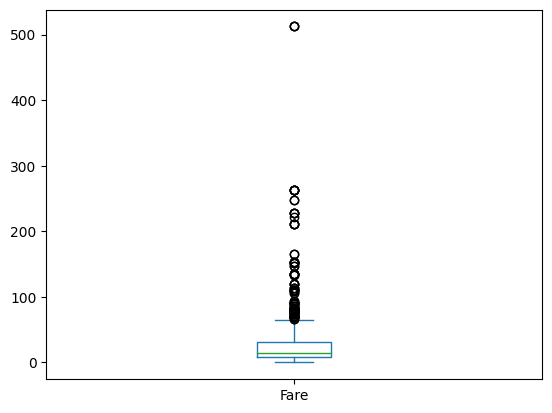

In [17]:
df['Fare'].plot(kind='box')

In [18]:
df[df['Fare']>200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### Survived
**conclusions**
- no null values
- about 62 % people die 

In [19]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

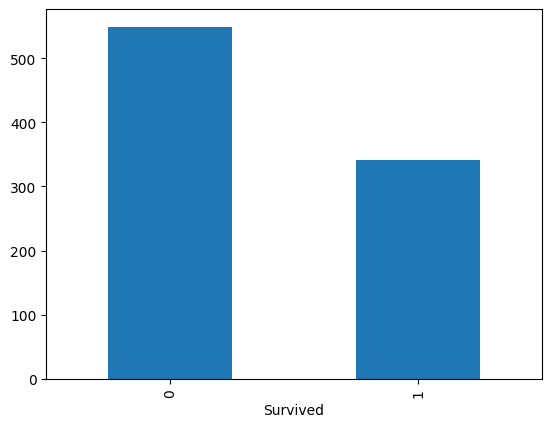

In [20]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

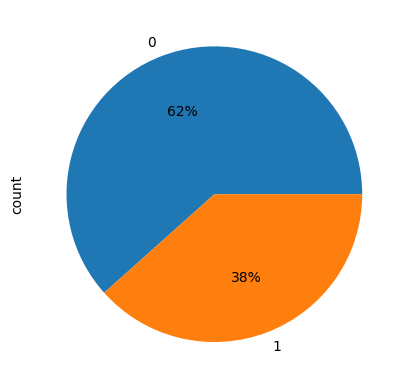

In [21]:
df['Survived'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [22]:
df['Survived'].isnull().sum()

0

In [23]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Pclass
**Conclusions**
- Surprisingly, there are more passengers in 1 class than in 2 class
- no null values 

In [24]:
df['Pclass'].isnull().sum()

0

<Axes: xlabel='Pclass'>

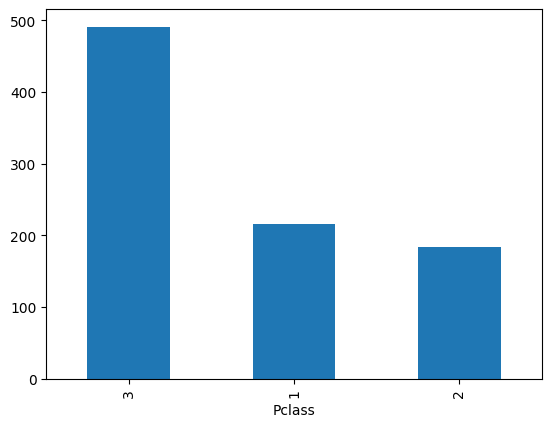

In [25]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

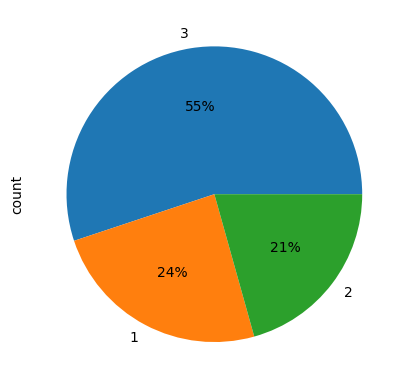

In [26]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.0f%%')

### Sex
**Conclusions**
- no null values 
- no surprising outputs 
- more no of male passengers than female 


In [27]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

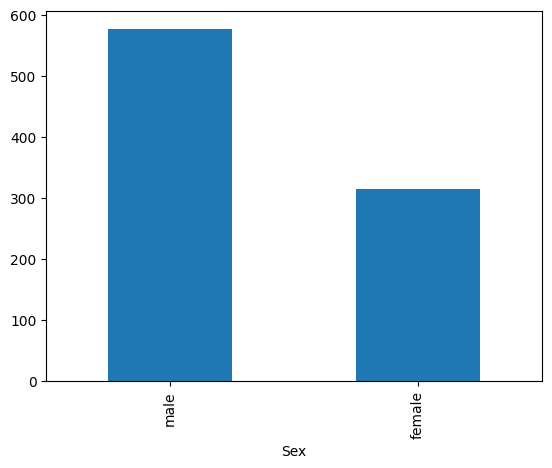

In [28]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

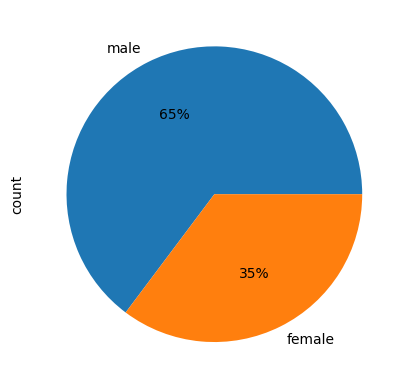

In [29]:
df['Sex'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [30]:
df['Sex'].isnull().sum()

0

### SibSp
**Conclusions**
- no null values 

In [31]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

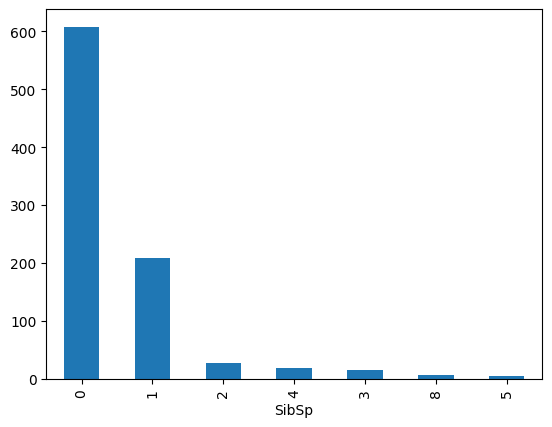

In [32]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

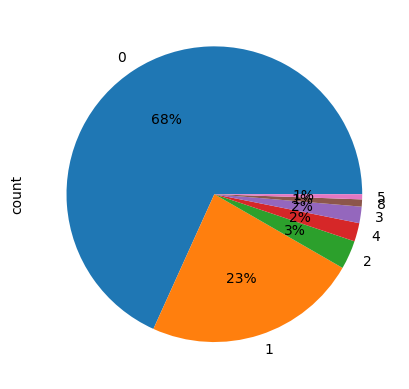

In [33]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%1.0f%%')   

### Parch
**Conclusions**
- Parch and SibSp column can be merged to form a new column called family_size
- create a new column called it_alone
- no null values


In [34]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: ylabel='count'>

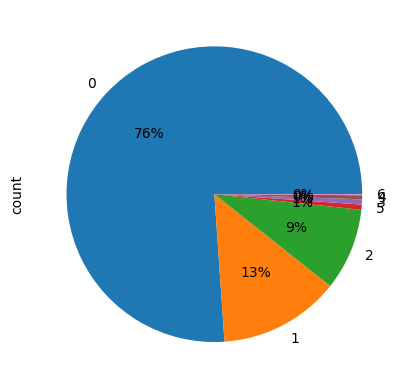

In [35]:
df['Parch'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [36]:
df['Parch'].isnull().sum()

0

### Embarked
**Conclusions**
- 2 null values
- 72 % people start their journey form southampton


In [37]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

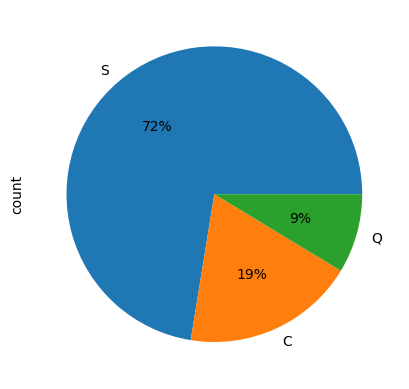

In [38]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [39]:
df['Embarked'].isnull().sum()

2

In [40]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Survived and Pclass
-- Categorical and Categorical


In [42]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [43]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

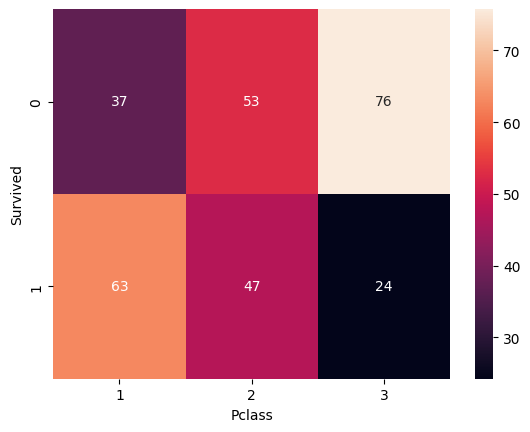

In [44]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100,annot=True)

In [45]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

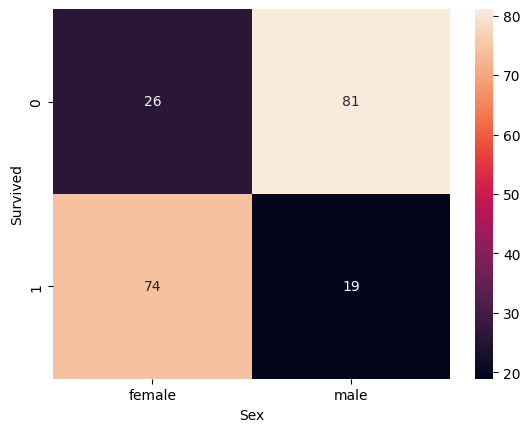

In [46]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100,annot=True)

### Numerical and Categorical
-- Age and Survived 

<Axes: ylabel='Density'>

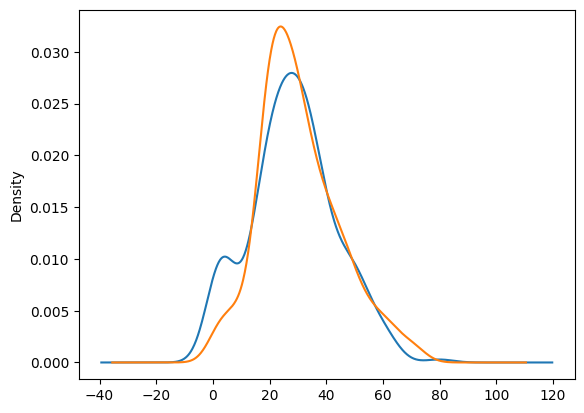

In [47]:
df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label='Not survived')

### Feature engineering

In [48]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [49]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [50]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [51]:
69.55/11

6.322727272727272

In [52]:
df1 = pd.read_csv('test.csv')

In [53]:
df=pd.concat([df,df1])

In [54]:
df[df['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [55]:
df['Individual_Fare']=df['Fare']/(df['SibSp']+df['Parch']+1)

In [56]:
df['Individual_Fare'].describe()

count    1308.000000
mean       20.518215
std        35.774337
min         0.000000
25%         7.452767
50%         8.512483
75%        24.237500
max       512.329200
Name: Individual_Fare, dtype: float64

In [57]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000


In [58]:
df['Family_Size']=df['SibSp']+df['Parch']+1

In [59]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


In [60]:
# family_type

## 1 --> alone
## 2 to 4 --> small
## else --> large

def transform_family_size(num):
    if num==1:
        return 'Alone'
    elif num>1 and num<5:
        return 'Small'
    else:
        return 'Large'
    




df['Family_Type']=df['Family_Size'].apply(transform_family_size)

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fare,Family_Size,Family_Type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,Alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,Alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,Alone


In [62]:
pd.crosstab(df['Survived'],df['Family_Type'],normalize='columns')*100

Family_Type,Alone,Large,Small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [63]:
df['Surname']=df['Name'].str.split(',').str.get(0)

In [64]:
df['Title']=df['Name'].str.split(',').str.get(1).str.split(' ').str.get(1)

In [65]:
df['Title'].value_counts()

Title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [66]:
df['Title'].replace(['Rev.','Dr.','Col.','Major.','Mlle.','Ms.','Mme.','Sir.','Lady.','Capt.','the','Jonkheer.','Don.','Dona.'],'Rare',inplace=True)

In [67]:
df['Title'].value_counts()

Title
Mr.        757
Miss.      260
Mrs.       197
Master.     61
Rare        34
Name: count, dtype: int64

In [68]:
df['Cabin'].isnull().sum()

1014

In [69]:
df['Cabin'].fillna('M',inplace=True)

In [70]:
df['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [71]:
df['deck'] = df['Cabin'].str[0]

In [72]:
df['deck'].value_counts()

deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [73]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='deck'>

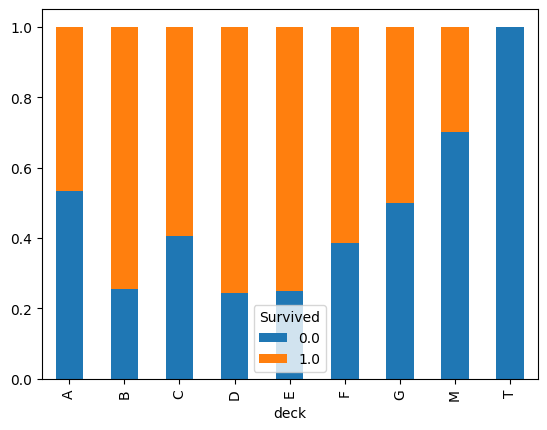

In [74]:
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)

c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: 

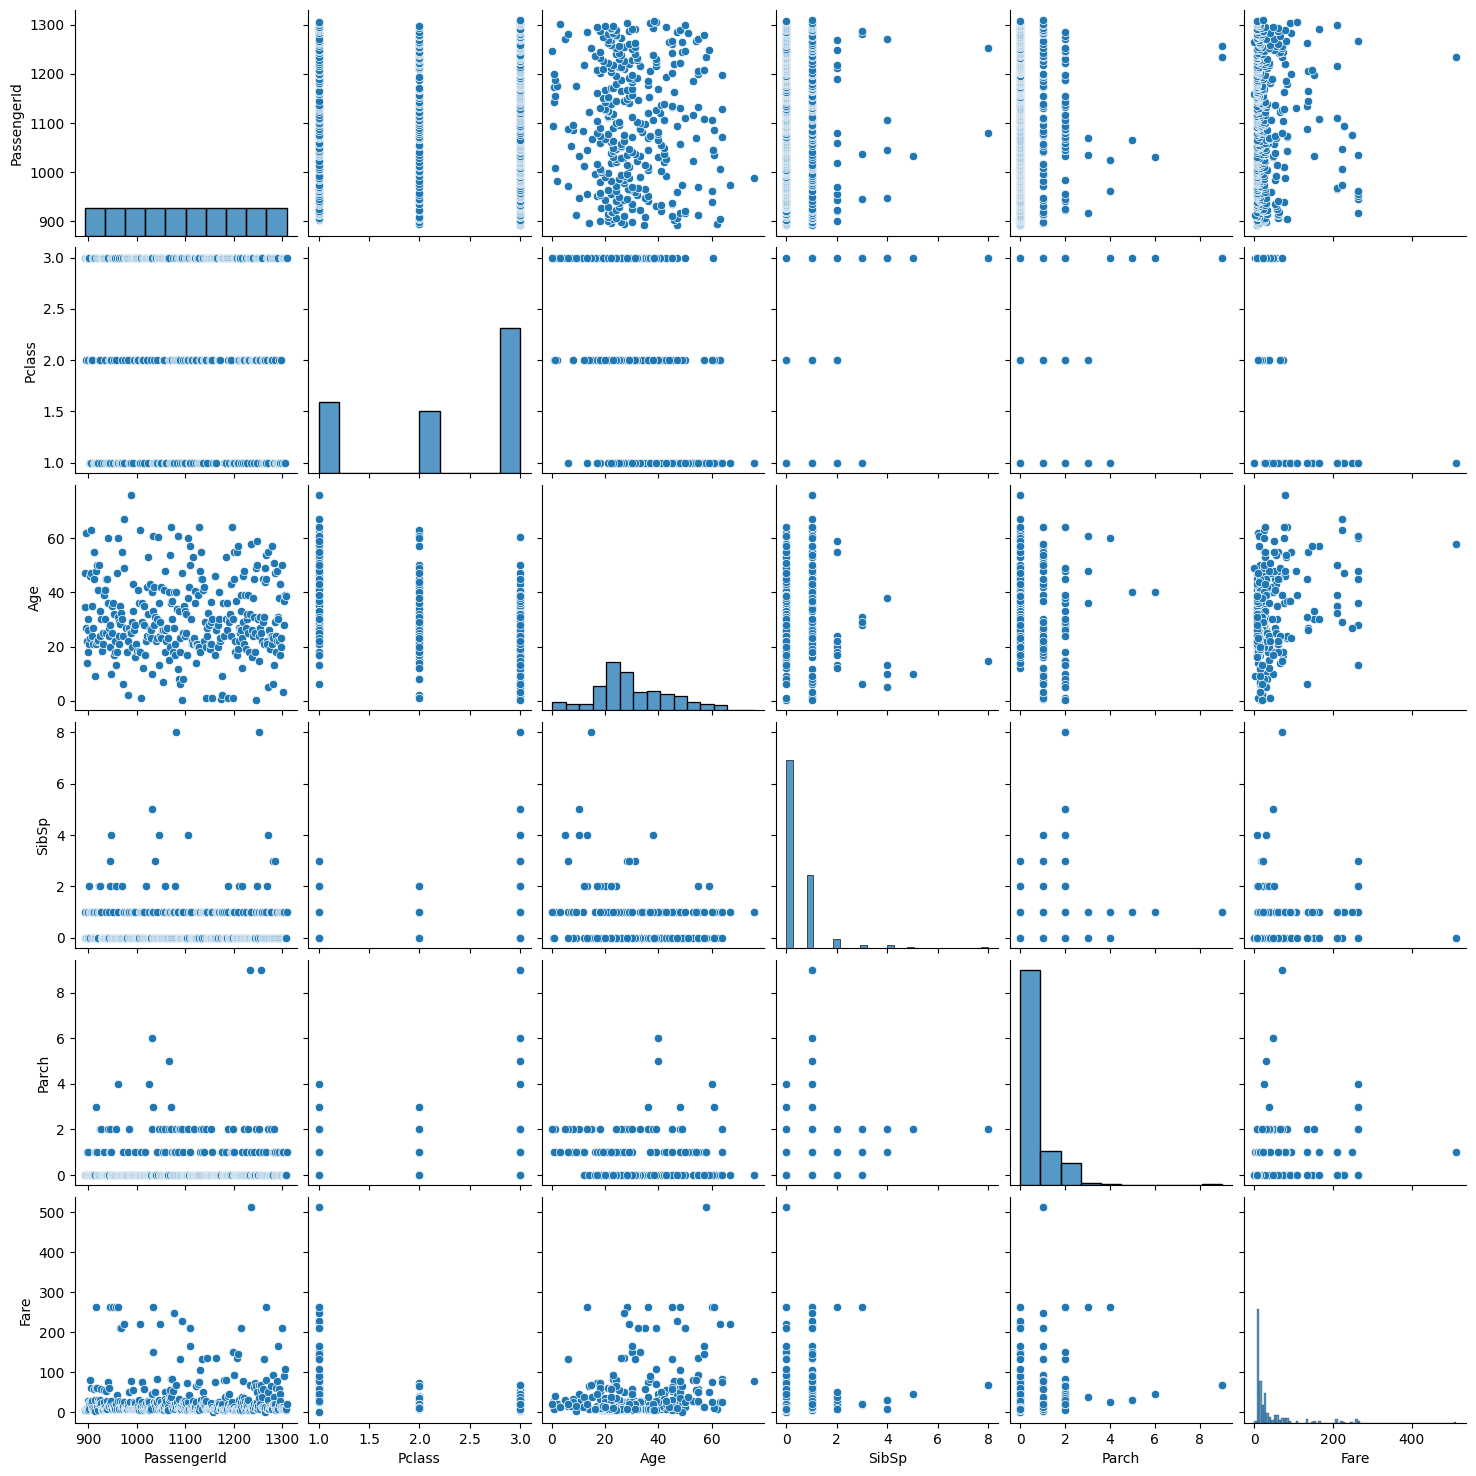

In [76]:
sns.pairplot(df1)